In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict

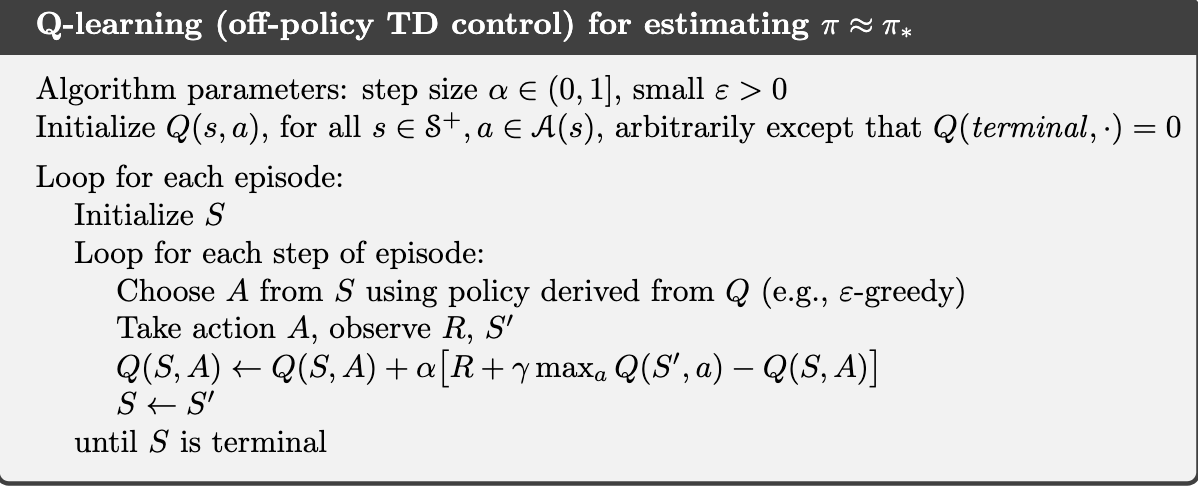

In [ ]:
def Q_Learning_Control(env, epsilon=0.1, step_size=0.5, discount_factor=1.0, episodes=10000, max_t=None):
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    for i in range(episodes):
        state, _ = env.reset()
        steps=0
        while(True):
            #eps greedy action
            greedy = np.flatnonzero(Q[state] == Q[state].max())
            probs = np.full(nA, epsilon/nA)
            probs[greedy] += (1.0-epsilon) / len(greedy)
            action = np.random.choice(nA, p=probs)
            s_next, reward, term, trun, _ = env.step(action)
            steps += 1
            Q[state][action] += step_size*(reward + discount_factor*(Q[s_next].max()) - Q[state][action])
            state = s_next
            if term or trun:
                break
            if max_t is not None and steps>=max_t:
                break
    return Q
